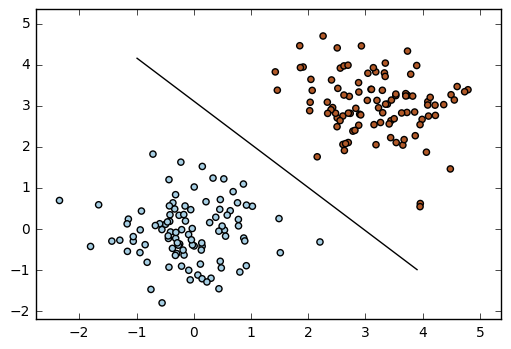

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# Create two point arrays one for positive samples and one for negative samples
n = 100

Positive_mean = [3,3]
Positive_cov = [[0.5, 0.0],[0.0, 0.5]]
Positive_points = np.random.multivariate_normal(Positive_mean, Positive_cov, n)

Negative_mean = [0,0]
Negative_cov = [[0.5, 0.0],[0.0, 0.5]]
Negative_points = np.random.multivariate_normal(Negative_mean, Negative_cov, n)

# Merge the two arrays into one
points = np.random.multivariate_normal(Negative_mean, Negative_cov, n*2)
for i in range(len(points)):
    if i < n:
        points[i] = Positive_points[i]
    else:
        points[i] = Negative_points[i-n]

# generate the target array
targets = np.ones(n*2)
for i in range(len(targets)):
    if i < n:
        targets[i] = 1
    else:
        targets[i] = 0

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, n_iter=200, fit_intercept=True)
clf.fit(points, targets)


# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]

plt.contour(X1, X2, Z, levels=[0.0], colors='k', linestyles='solid')
plt.scatter(points[:, 0], points[:, 1], c=targets, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()
